In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing table
import pandas as pd
from sklearn.linear_model import LinearRegression
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/card_transdata.csv')
x_data = data.iloc[:,0:7]
y_data = data.iloc[:, 7:]

In [ ]:
#seperating test and training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, 
    y_data, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)
y_train.values.ravel()

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#WARNING: NEXT SECTIONS CAN TAKE SOME TIME
#Multi-layer perceptron
from sklearn.neural_network import MLPClassifier
mlp800_clf = MLPClassifier(max_iter = 3, random_state = 42) #multi layer perceptron; max_iter = epochs; also adjust hyperparameters for paper
mlp800_clf.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=3, random_state=42)

In [ ]:
#Cross-val score
from sklearn.model_selection import cross_val_score
cross_val_score(mlp800_clf, x_data, y_data.values.ravel(), cv=3, scoring = 'accuracy')

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.98978202, 0.99063999, 0.99205899])

In [ ]:
from sklearn.model_selection import cross_val_predict
y_cross_predict = cross_val_predict(mlp800_clf, x_train, y_train.values.ravel(), cv = 3) #hyperparameters part 3?


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#Accuracy of the cross_val
from sklearn.metrics import *
precision = precision_score(y_train, y_cross_predict, average = "macro")
accuracy = accuracy_score(y_train, y_cross_predict)
recall = recall_score (y_train, y_cross_predict, pos_label = 1)
f1 = f1_score(y_train, y_cross_predict, pos_label = 1)
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.9666477232112727
Accuracy: 0.9893125
Recall: 0.9385648942252716
F1: 0.9388735576304389


In [ ]:
#Predictions using the test set
y_test_pred = mlp800_clf.predict(x_test)

In [ ]:
#Accuracy of the prediction
from sklearn.metrics import *
precision = precision_score(y_test, y_test_pred, average = "macro")
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score (y_test, y_test_pred, pos_label = 1)
f1 = f1_score(y_test, y_test_pred, pos_label = 1)
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.9858749448899697
Accuracy: 0.994545
Recall: 0.9617038353494238
F1: 0.968505528131405


array([[182134,    423],
       [   668,  16775]])

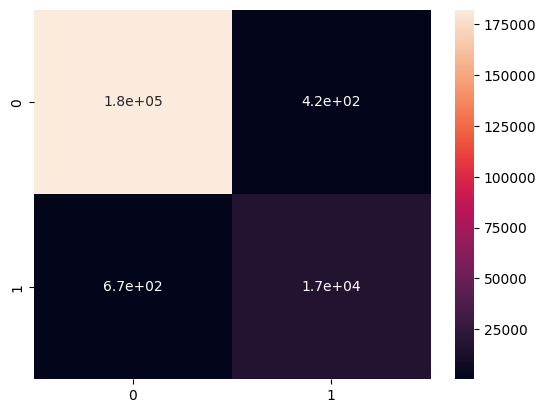

In [ ]:
#create the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True)
cm